In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

In [206]:
data = pd.read_csv("books.csv")

In [207]:
data

,Title,Price,Rating,Availability,Category
0,A Light in the Attic,Â£51.77,Three,In stock,Poetry
1,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four,In stock,Business
2,Sharp Objects,Â£47.82,Four,In stock,Mystery
3,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock,History
4,Tipping the Velvet,Â£53.74,One,In stock,Historical Fiction
...,...,...,...,...,...
995,"1,000 Places to See Before You Die",Â£26.08,Five,In stock,Travel
996,Bridget Jones's Diary (Bridget Jones #1),Â£29.82,One,In stock,Womens Fiction
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,Five,In stock,Historical Fiction
998,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,Four,In stock,Sequential Art


In [208]:
# Removing the symbol from the price and transforming it to float
data['Price'] = data['Price'].str.replace("Â£", "", regex=False).astype(float)

In [209]:
# Creating a rating map that'll be usefull to creating a numeric column of ratings
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

# Creating a numeric column of ratings
data["Rating_Num"] = data["Rating"].map(rating_map)

In [210]:
# Creating a series with the top 9 categories plus the sum of all the other categories (which make the category "Others")
categories_perc = round(data['Category'].value_counts()*100/data['Category'].value_counts().sum(), 2)

top_9_categories_perc = pd.Series(categories_perc[:9])
others_sum = categories_perc[9:].sum()
others_sum = pd.Series(others_sum, index=['Others'])

top_10_categories_perc = pd.concat([top_9_categories_perc, others_sum])

In [211]:
# Creating a column with the price ranges 
bins=[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels=['10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60']

data['PriceRange'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

In [212]:
count_price_range = data.groupby(by='PriceRange', observed=True).agg(['count'])['Price']#.sort_values(by='count', ascending=False)
count_price_range['percentage'] = round(count_price_range['count']*100/count_price_range['count'].sum(), 2)

In [217]:
count_price_range

,count,percentage
PriceRange,,
10-15,106,10.6
15-20,90,9.0
20-25,103,10.3
25-30,103,10.3
30-35,82,8.2
35-40,113,11.3
40-45,102,10.2
45-50,103,10.3
50-55,100,10.0


In [218]:
count_rating = data.groupby(by='Rating_Num', observed=True).agg(['count'])['Price'].sort_index()
count_rating['percentage'] = round(count_rating['count']*100/count_rating['count'].sum(), 2)

In [219]:
count_rating

,count,percentage
Rating_Num,,
1,226,22.6
2,196,19.6
3,203,20.3
4,179,17.9
5,196,19.6


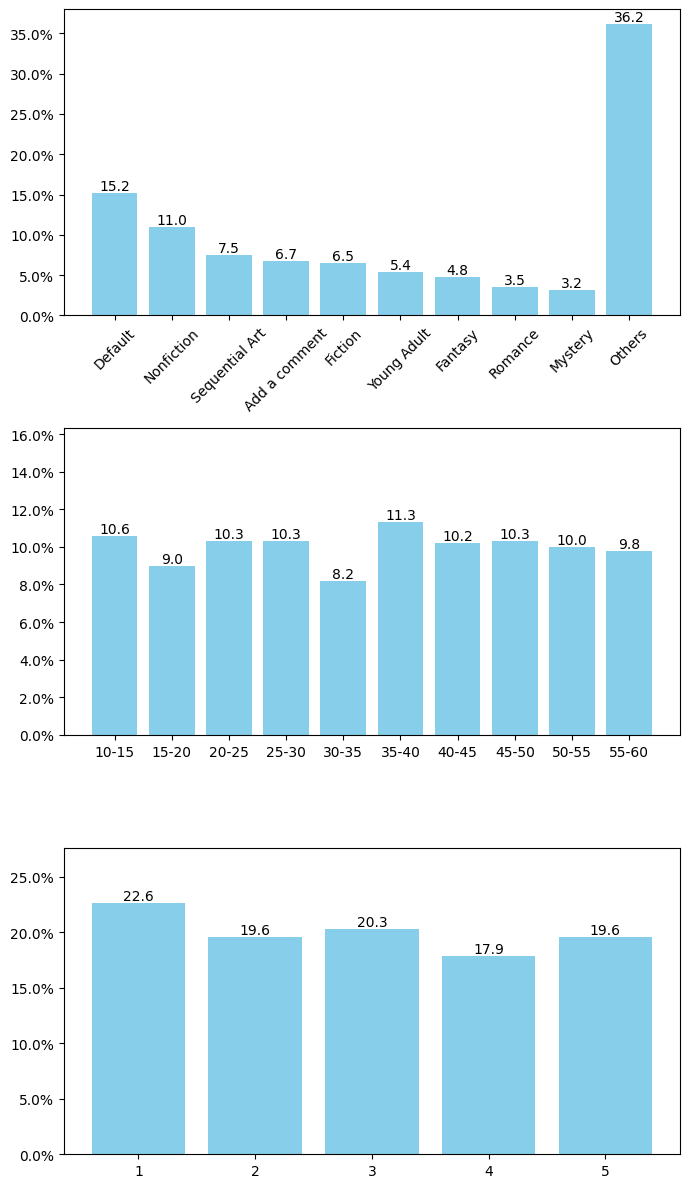

In [227]:
fig, ax = plt.subplots(figsize = (7, 12), nrows=3, ncols=1)

ax = ax.flatten()

categories_bar = ax[0].bar(
    x=top_10_categories_perc.index,
    height=top_10_categories_perc,
    color='skyblue'
)

ax[0].bar_label(
    container=categories_bar,
    labels=top_10_categories_perc
)

ax[0].set_xticks(ticks=top_10_categories_perc.index)
ax[0].set_xticklabels(labels=top_10_categories_perc.index, rotation=45)
ax[0].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=1))

price_range_bar = ax[1].bar(
    x=count_price_range.index,
    height=count_price_range['percentage'],
    color='skyblue'
)

ax[1].bar_label(
    container=price_range_bar,
    labels=count_price_range['percentage']
)

ax[1].set_ylim(bottom=0, top=count_price_range['percentage'].max()+5)
ax[1].set_xticks(ticks=count_price_range.index)
#ax.set_xticklabels(labels=count_price_range.index, rotation=45)
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=1))

rating_bar = ax[2].bar(
    x=count_rating.index,
    height=count_rating['percentage'],
    color='skyblue'
)

ax[2].bar_label(
    container=rating_bar,
    labels=count_rating['percentage']
)

ax[2].set_ylim(bottom=0, top=count_rating['percentage'].max()+5)
ax[2].set_xticks(ticks=count_rating.index)
#ax.set_xticklabels(labels=count_rating.index, rotation=45)
ax[2].yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=1))

plt.tight_layout()

plt.show()